In [1]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.sql import Row
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *

In [2]:
spark = SparkSession.builder.appName('GroundWaterApp').getOrCreate()
df = spark.read.csv('/GroundWater/Fluoride.csv', inferSchema=True, header = True)

In [3]:
df.take(1)

[Row(Sl No=1, District=u'Bagalkot', Block=u'Beelagi', Location=u'Teggi', Fluoride=2.5)]

In [4]:
df.registerTempTable('FluorideCopy')

In [5]:
df.show(100)

+-----+--------------+----------------+--------------------+--------+
|Sl No|      District|           Block|            Location|Fluoride|
+-----+--------------+----------------+--------------------+--------+
|    1|      Bagalkot|         Beelagi|               Teggi|     2.5|
|    2|      Bagalkot|           Bilgi|               Bilgi|     2.3|
|    3|      Bagalkot|       Hunugunda|            Amingarh|     4.4|
|    4|      Bagalkot|       Hunugunda|         Binjawadige|     4.2|
|    5|      Bagalkot|       Hunugunda|               Ilkal|     4.2|
|    6|      Bagalkot|       Hunugunda|             Kodihal|     2.6|
|    7|      Bagalkot|       Hunugunda|          Nandwadige|     1.7|
|    8|      Bagalkot|       Hunugunda|                Tumb|     1.5|
|    9|     Bangalore|  Doddaballapura|         S.S. Ghatti|     2.2|
|   10|     Bangalore|      Kanakapura|              Hegnur|     2.2|
|   11|     Bangalore|          Magadi|Guddamarna Hali C...|     1.5|
|   12|     Bangalor

In [6]:
df.printSchema()

root
 |-- Sl No: integer (nullable = true)
 |-- District: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Fluoride: double (nullable = true)



In [7]:
df.describe()

DataFrame[summary: string, Sl No: string, District: string, Block: string, Location: string, Fluoride: string]

In [8]:
df.describe('Fluoride').show()

+-------+------------------+
|summary|          Fluoride|
+-------+------------------+
|  count|                93|
|   mean|2.3315053763440847|
| stddev|0.8800592201375095|
|    min|               1.5|
|    max|               4.9|
+-------+------------------+



In [9]:
df.filter(df['fluoride'] > 2.0).show(50)

+-----+-----------+--------------+--------------+--------+
|Sl No|   District|         Block|      Location|Fluoride|
+-----+-----------+--------------+--------------+--------+
|    1|   Bagalkot|       Beelagi|         Teggi|     2.5|
|    2|   Bagalkot|         Bilgi|         Bilgi|     2.3|
|    3|   Bagalkot|     Hunugunda|      Amingarh|     4.4|
|    4|   Bagalkot|     Hunugunda|   Binjawadige|     4.2|
|    5|   Bagalkot|     Hunugunda|         Ilkal|     4.2|
|    6|   Bagalkot|     Hunugunda|       Kodihal|     2.6|
|    9|  Bangalore|Doddaballapura|   S.S. Ghatti|     2.2|
|   10|  Bangalore|    Kanakapura|        Hegnur|     2.2|
|   14|     Belary|       Bellary|      Kurugodu|     2.2|
|   18|     Belary|        Hospet|   Kamalapuram|     2.5|
|   22|      Bidar|         Bidar|         Bidar|     2.7|
|   23|    Bijapur|      Bagewadi|Huvinahippargi|     2.8|
|   24|    Bijapur|      Bagewadi|     Nidugundi|     4.9|
|   28|    Bijapur|          Indi|      Chadchan|     2.

In [10]:
import pandas as pd
pandas_df = df.toPandas()

(0, 93)

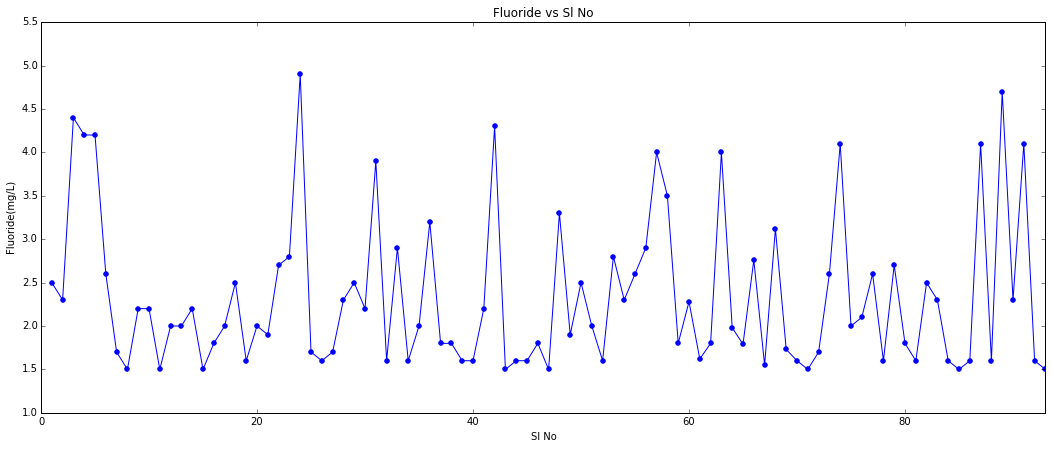

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(18,7),dpi=100)
plt.plot(pandas_df['Sl No'],pandas_df['Fluoride'])
plt.scatter(pandas_df['Sl No'],pandas_df['Fluoride'],color=['blue'])
plt.xlabel('Sl No',color='black')
plt.ylabel('Fluoride(mg/L)',color='black')
plt.title('Fluoride vs Sl No',color='black')
plt.xlim(0,93)
#plt.savefig('scatter Fluoride')

(0.5, 93)

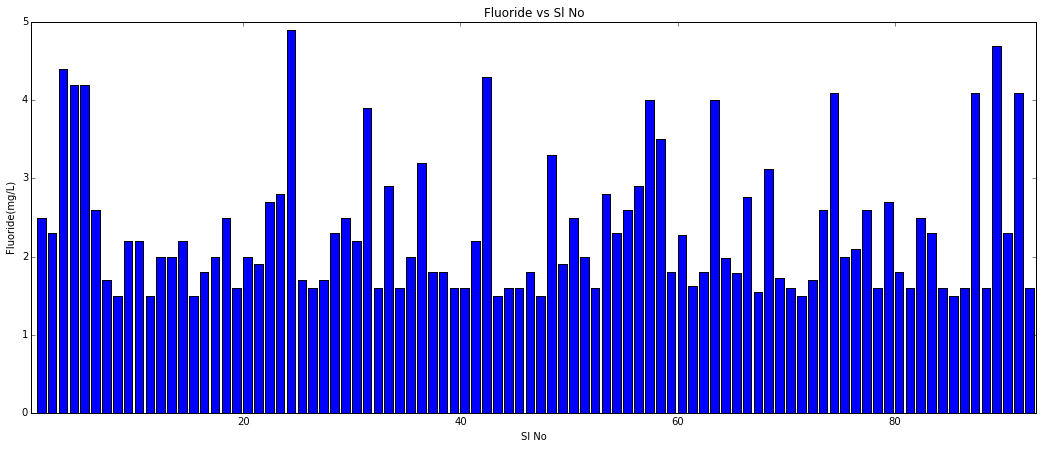

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(18,7),dpi=100)
plt.bar(pandas_df['Sl No'],pandas_df['Fluoride'],color=['blue'])
plt.xlabel('Sl No',color='black')
plt.ylabel('Fluoride(mg/L)',color='black')
plt.title('Fluoride vs Sl No',color='black')
plt.xlim(0.5,93)
#plt.savefig('bar Fluoride')

In [13]:
df.createOrReplaceTempView("Karnataka1")

In [14]:
fluoridelowlevel = spark.sql("SELECT District,Block,Fluoride FROM Karnataka1 WHERE Fluoride BETWEEN 1.2 AND 1.5")
fluoridelowlevel.show()

+-----------+----------------+--------+
|   District|           Block|Fluoride|
+-----------+----------------+--------+
|   Bagalkot|       Hunugunda|     1.5|
|  Bangalore|          Magadi|     1.5|
|     Belary|         Bellary|     1.5|
|Chitradurga|       Hosadurga|     1.5|
|  Davangere|         Jagalur|     1.5|
|      Kolar|       Mulabagal|     1.5|
|     Mysore|Krishnarajanagar|     1.5|
|     Tumkur|          Tiptur|     1.5|
+-----------+----------------+--------+



In [15]:
fluoridemediumlevel = spark.sql("SELECT District,Block,Fluoride FROM Karnataka1 WHERE Fluoride BETWEEN 1.6 AND 3.0")
fluoridemediumlevel.show(100)

+--------------+--------------+--------+
|      District|         Block|Fluoride|
+--------------+--------------+--------+
|      Bagalkot|       Beelagi|     2.5|
|      Bagalkot|         Bilgi|     2.3|
|      Bagalkot|     Hunugunda|     2.6|
|      Bagalkot|     Hunugunda|     1.7|
|     Bangalore|Doddaballapura|     2.2|
|     Bangalore|    Kanakapura|     2.2|
|     Bangalore|      Ramnagar|     2.0|
|        Belary|       Bellary|     2.0|
|        Belary|       Bellary|     2.2|
|        Belary|     Hadagalli|     1.8|
|        Belary|        Hospet|     2.0|
|        Belary|        Hospet|     2.5|
|        Belary|        Hospet|     1.6|
|       Belgaum|         Gokak|     2.0|
|       Belgaum|     Saundatti|     1.9|
|         Bidar|         Bidar|     2.7|
|       Bijapur|      Bagewadi|     2.8|
|       Bijapur|      Bagewadi|     1.7|
|       Bijapur|       Bijapur|     1.6|
|       Bijapur|       Bijapur|     1.7|
|       Bijapur|          Indi|     2.3|
|       Bijapur|

In [16]:
fluoridehighlevel = spark.sql("SELECT District,Block,Fluoride FROM Karnataka1 WHERE Fluoride > 3.0")
fluoridehighlevel.show(100)

+-----------+----------+--------+
|   District|     Block|Fluoride|
+-----------+----------+--------+
|   Bagalkot| Hunugunda|     4.4|
|   Bagalkot| Hunugunda|     4.2|
|   Bagalkot| Hunugunda|     4.2|
|    Bijapur|  Bagewadi|     4.9|
|    Bijapur|      Indi|     3.9|
|    Bijapur|Muddebihal|     3.2|
|Chitradurga| Hosadurga|     4.3|
|    Dharwad|   Dharwar|     3.3|
|      Gadag|Shirahatti|     4.0|
|      Gadag|Shirahatti|     3.5|
|   Gulbarga|  Shahapur|     4.0|
|   Gulbarga|  Shorapur|    3.12|
|     Koppal|Gangavathi|     4.1|
|    Raichur|  Linsugur|     4.1|
|    Raichur| Sindhanur|     4.7|
|    Raichur| Sindhanur|     4.1|
+-----------+----------+--------+



In [17]:
fluoridelowlevel.write.csv('fl_low.csv')

AnalysisException: u'path hdfs://localhost:9000/user/SYSTEM/fl_low.csv already exists.;'

In [ ]:
fluoridemediumlevel.write.csv('fl_med.csv')

In [ ]:
fluoridehighlevel.write.csv('fl_high.csv')

In [ ]:
df1 = spark.read.csv('/user/SYSTEM/fl_low.csv/low.csv', inferSchema=False, header = False)

In [ ]:
df1.printSchema()

In [ ]:
df1=df1.withColumnRenamed("_c0","District")
df1=df1.withColumnRenamed("_c1","Block")
df1=df1.withColumnRenamed("_c2","Fluoride")

In [ ]:
df1.show()

In [ ]:
df2 = spark.read.csv('/user/SYSTEM/fl_med.csv/med.csv', inferSchema=False, header = False)
df2.show()

In [ ]:
df2 = df2.withColumnRenamed("_c0","District")
df2 = df2.withColumnRenamed("_c1","Block")
df2 = df2.withColumnRenamed("_c2","Fluoride")
df2.show()

In [ ]:
df3 = spark.read.csv('/user/SYSTEM/fl_high.csv/high.csv', inferSchema=False, header = False)
df3.show()

In [ ]:
df3 = df3.withColumnRenamed("_c0","District")
df3 = df3.withColumnRenamed("_c1","Block")
df3 = df3.withColumnRenamed("_c2","Fluoride")
df3.show()